# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

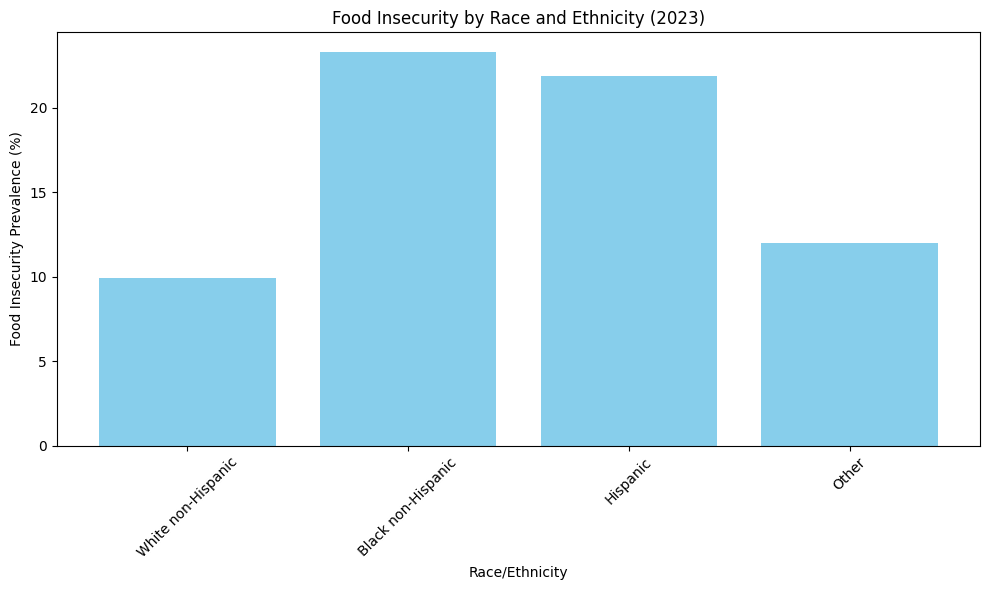

     Year                      Category         Subcategory Sub-subcategory  \
673  2023  Race/ethnicity of households  White non-Hispanic             NaN   
674  2023  Race/ethnicity of households  Black non-Hispanic             NaN   
675  2023  Race/ethnicity of households            Hispanic             NaN   
676  2023  Race/ethnicity of households               Other             NaN   

     Total  Food secure-1,000  Food secure-percent  Food insecure-1,000  \
673  85275              76855                 90.1                 8420   
674  17020              13053                 76.7                 3967   
675  19593              15298                 78.1                 4295   
676  10644               9370                 88.0                 1274   

     Food insecure-percent Low food security-1,000  Low food security-percent  \
673                    9.9                    5077                        6.0   
674                   23.3                    2479                

In [ ]:
# Start your code here
import pandas as pd
import matplotlib.pyplot as plt

file_url = 'https://github.com/IT4063C-Fall24/final-project-Jsheppard99/raw/main/assets/foodsecurity_datafile.xlsx'
data = pd.read_excel(file_url, sheet_name='Food security, all households')

desired_category = 'Race/ethnicity of households'

data_2023 = data[(data['Year'] == 2023) & (data['Category'] == desired_category)]

race_ethnicity = data_2023['Subcategory'].dropna()
food_insecurity = data_2023['Food insecure-percent'].dropna()

data_clean = pd.DataFrame({'Race/Ethnicity': race_ethnicity, 'Food Insecurity': food_insecurity}).dropna()

plt.figure(figsize=(10, 6))
plt.bar(data_clean['Race/Ethnicity'], data_clean['Food Insecurity'], color='skyblue')
plt.xlabel("Race/Ethnicity")
plt.ylabel("Food Insecurity Prevalence (%)")
plt.title("Food Insecurity by Race and Ethnicity (2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

data = data.dropna(subset=['Year', 'Category'])
data_2023 = data_2023.dropna(subset=['Subcategory', 'Food insecure-percent'])
print(data_2023)

# dropping duplicates and rows with missing values


# This organizes food insecurity by state so we can see which states suffer the most and appropriately reroute potential 
# food waste to areas in need before it has the chance to be thrown out.

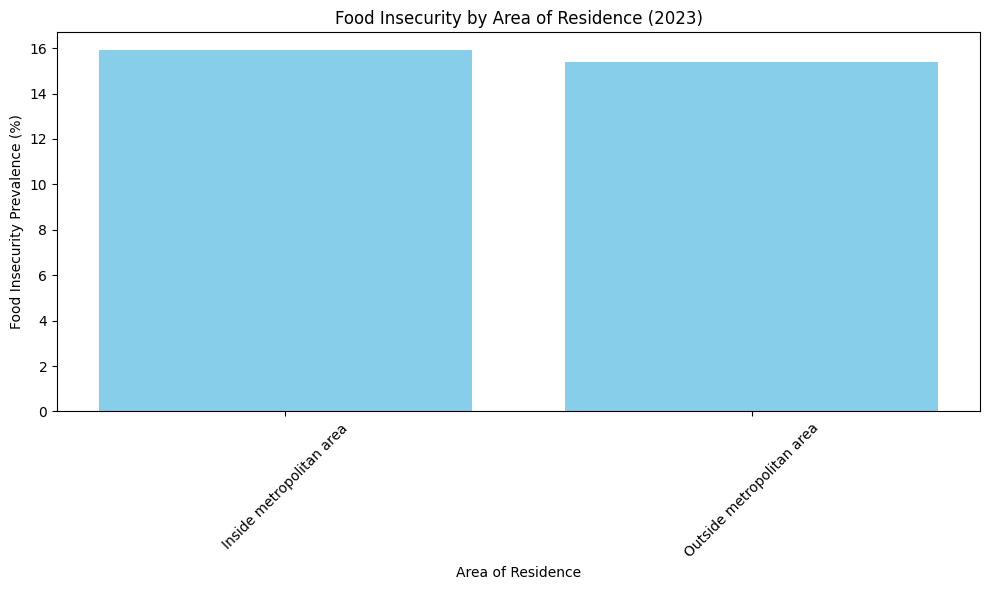

     Year           Category                Subcategory  \
682  2023  Area of residence   Inside metropolitan area   
683  2023  Area of residence   Inside metropolitan area   
684  2023  Area of residence   Inside metropolitan area   
685  2023  Area of residence  Outside metropolitan area   

             Sub-subcategory   Total  Food secure-1,000  Food secure-percent  \
682                      NaN  114065              98963                 86.8   
683      In principal cities   37405              31439                 84.1   
684  Not in principal cities   59419              52451                 88.3   
685                      NaN   18467              15614                 84.6   

     Food insecure-1,000  Food insecure-percent Low food security-1,000  \
682                15102                   13.2                    9441   
683                 5966                   15.9                    3753   
684                 6968                   11.7                    4361   
685

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_url = 'https://github.com/IT4063C-Fall24/final-project-Jsheppard99/raw/main/assets/foodsecurity_datafile.xlsx'
data = pd.read_excel(file_url, sheet_name='Food security, all households')

desired_category = 'Area of residence'

data_2023 = data[(data['Year'] == 2023) & (data['Category'] == desired_category)]

area_of_residence = data_2023['Subcategory'].dropna()
food_insecurity = data_2023['Food insecure-percent'].dropna()

data_clean = pd.DataFrame({'Area of Residence': area_of_residence, 'Food Insecurity': food_insecurity}).dropna()

plt.figure(figsize=(10, 6))
plt.bar(data_clean['Area of Residence'], data_clean['Food Insecurity'], color='skyblue')
plt.xlabel("Area of Residence")
plt.ylabel("Food Insecurity Prevalence (%)")
plt.title("Food Insecurity by Area of Residence (2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

data_2023 = data_2023.dropna(subset=['Subcategory', 'Food insecure-percent'])
data_2023 = data_2023.drop_duplicates()
print(data_2023)
# dropping duplicates and rows with missing values


# We can use this graph to compare inner city food insecurities to those who live 
# outside the downtown districts to decide whether residence in relation to the city is a factor in food scarcity.

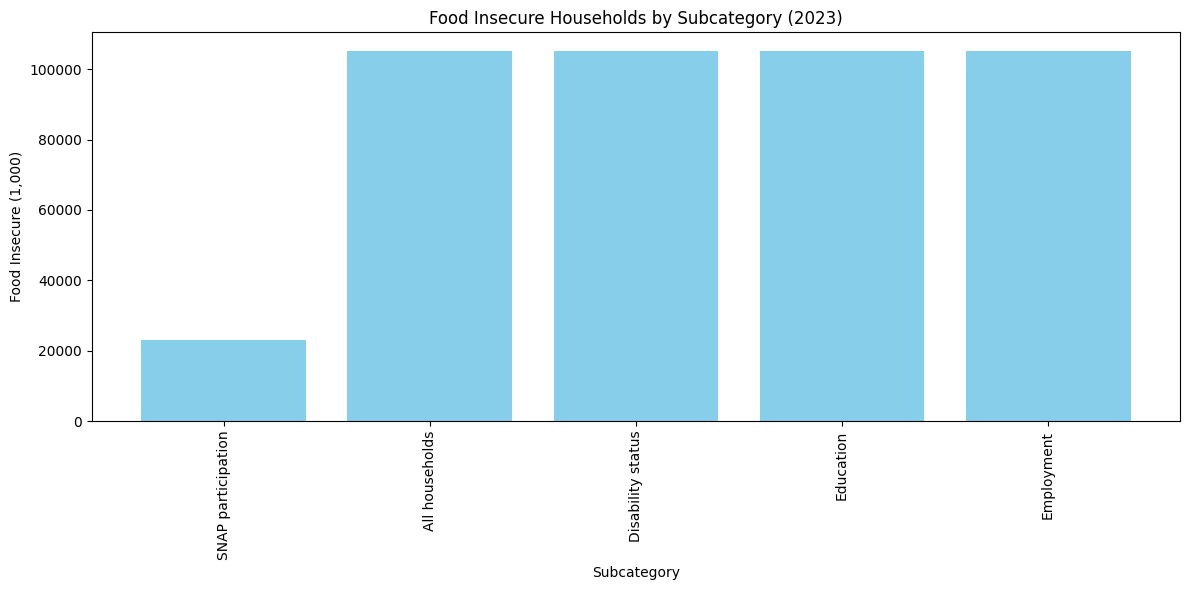

     Year        Category        Subcategory  \
0    2017  All households     All households   
1    2017  All households         Employment   
2    2017  All households         Employment   
3    2017  All households         Employment   
4    2017  All households         Employment   
..    ...             ...                ...   
125  2023  All households          Education   
126  2023  All households  Disability status   
127  2023  All households  Disability status   
128  2023  All households  Disability status   
129  2023  All households  Disability status   

                          Sub-subcategory       Total  Food insecure-1,000  \
0                          All households  127272.250            15018.250   
1                               Full-time   83680.650             7871.150   
2                                 Retired   26902.615             2002.015   
3          Part-time non-economic reasons    5672.526             1055.056   
4              Part-time economic

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_url = 'https://github.com/IT4063C-Fall24/final-project-Jsheppard99/raw/main/assets/foodsecurity_datafile.xlsx'
data = pd.read_excel(file_url, sheet_name='Educ, emp, disability')

filtered_data = data[['Category', 'Subcategory', 'Food insecure-1,000']]

grouped_data = filtered_data.groupby(['Category', 'Subcategory']).sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(grouped_data['Subcategory'], grouped_data['Food insecure-1,000'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Subcategory')
plt.ylabel('Food Insecure (1,000)')
plt.title('Food Insecure Households by Subcategory (2023)')
plt.tight_layout()

plt.show()

data = data.drop_duplicates()
data = data.dropna(subset=['Category', 'Subcategory', 'Food insecure-1,000'])
print(data)

# dropping duplicates and rows with missing values



# We can use this bar graph to see whether employment and 
# education status is a factor in those struggling with food insecurity, then reroute food to areas with a high concentration of these social groups.

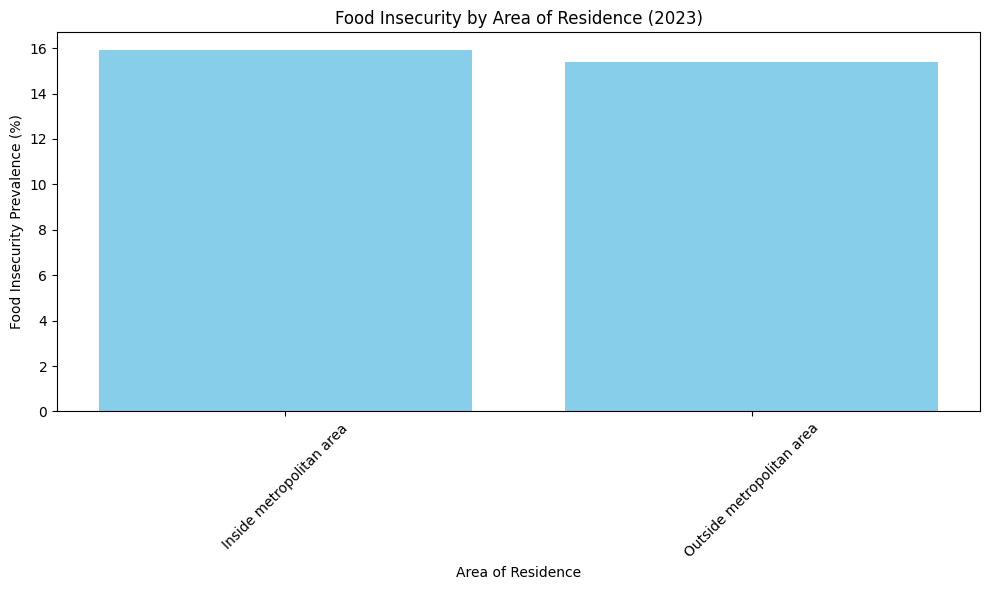

     Year           Category                Subcategory  \
682  2023  Area of residence   Inside metropolitan area   
683  2023  Area of residence   Inside metropolitan area   
684  2023  Area of residence   Inside metropolitan area   
685  2023  Area of residence  Outside metropolitan area   

             Sub-subcategory   Total  Food secure-1,000  Food secure-percent  \
682                      NaN  114065              98963                 86.8   
683      In principal cities   37405              31439                 84.1   
684  Not in principal cities   59419              52451                 88.3   
685                      NaN   18467              15614                 84.6   

     Food insecure-1,000  Food insecure-percent Low food security-1,000  \
682                15102                   13.2                    9441   
683                 5966                   15.9                    3753   
684                 6968                   11.7                    4361   
685

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_url = 'https://github.com/IT4063C-Fall24/final-project-Jsheppard99/raw/main/assets/foodsecurity_datafile.xlsx'
data = pd.read_excel(file_url, sheet_name='Food security, all households')

desired_category = 'Area of residence'

data_2023 = data[(data['Year'] == 2023) & (data['Category'] == desired_category)]

area_of_residence = data_2023['Subcategory'].dropna()
food_insecurity = data_2023['Food insecure-percent'].dropna()

data_clean = pd.DataFrame({'Area of Residence': area_of_residence, 'Food Insecurity': food_insecurity}).dropna()

plt.figure(figsize=(10, 6))
plt.bar(data_clean['Area of Residence'], data_clean['Food Insecurity'], color='skyblue')
plt.xlabel("Area of Residence")
plt.ylabel("Food Insecurity Prevalence (%)")
plt.title("Food Insecurity by Area of Residence (2023)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

data_2023 = data_2023.dropna(subset=['Subcategory', 'Food insecure-percent'])
data_2023 = data_2023.drop_duplicates()
print(data_2023)

# dropping duplicates and rows with missing values

# Through this graph we can identify which races are most affected by food insecurity and allocate more resources to those communities.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [8]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 6193 bytes to source.py
